# Agglomerative Clustering

### Question : Write a program to do agglomerative clustering based on single-linkage, complete-linkage 

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import pairwise_distances
from scipy.cluster.hierarchy import dendrogram, linkage
import sys

In [16]:
def find_clusters(input_data, linkage):
    row_index = -1
    col_index = -1
    clustering_order = []
    
    # Clustering n-1 times
    for k in range(1, input_data.shape[0]):
        min_val = sys.maxsize
        
        # Phase 1: Finding the minimum distance points
        for i in range(0, input_data.shape[0]):
            for j in range(0, input_data.shape[1]):
                if(input_data[i][j]<=min_val):
                    min_val = input_data[i][j]
                    row_index = i
                    col_index = j
                    
        clustering_order.append([row_index, col_index])
        
        # Phae 2: Updating proximity matrix
        
        #For Single Linkage
        if(linkage == "single" or linkage =="Single"):
            for i in range(0,input_data.shape[0]):
                if(i != col_index):
                    temp = min(input_data[col_index][i],input_data[row_index][i])
                    input_data[col_index][i] = temp
                    input_data[i][col_index] = temp
                    
        #For Complete Linkage
        elif(linkage=="Complete" or linkage == "complete"):
             for i in range(0,input_data.shape[0]):
                if(i != col_index and i!=row_index):
                    temp = max(input_data[col_index][i],input_data[row_index][i])
                    input_data[col_index][i] = temp
                    input_data[i][col_index] = temp
                
        for i in range (0,input_data.shape[0]):
            input_data[row_index][i] = np.Inf
            input_data[i][row_index] = np.Inf
            
        print(input_data)
        print("+"*50)
        
    print("="*50)
    print("Clustering order is: ", clustering_order)
    return clustering_order

In [18]:
def agglomerative_clustering(data, link=1):
    # Calculate Proximity matrix
    initial_distances = pairwise_distances(data,metric='euclidean')
    
    # Make diagonal elements infinity
    np.fill_diagonal(initial_distances, np.Inf)
    print(initial_distances)
    print("+"*50)
    if link == 1:
        clusters = find_clusters(initial_distances,linkage="single")
        Z = linkage(data, 'single')
        fig = plt.figure(figsize=(25, 10))
        dendrogram(Z)
    elif link == 2:
        clusters = find_clusters(initial_distances,linkage="complete")
        Z = linkage(data, 'complete')
        fig = plt.figure(figsize=(25, 10))
        dendrogram(Z)

In [19]:
data = np.array([100., 200.,300., 400.,500., 250.,450., 500.,450., 750.]).reshape(5, 2)
data

array([[100., 200.],
       [300., 400.],
       [500., 250.],
       [450., 500.],
       [450., 750.]])

[[         inf 282.84271247 403.11288741 460.97722286 651.92024052]
 [282.84271247          inf 250.         180.27756377 380.78865529]
 [403.11288741 250.                  inf 254.95097568 502.49378106]
 [460.97722286 180.27756377 254.95097568          inf 250.        ]
 [651.92024052 380.78865529 502.49378106 250.                  inf]]
++++++++++++++++++++++++++++++++++++++++++++++++++
[[         inf 282.84271247 403.11288741          inf 651.92024052]
 [282.84271247          inf 250.                  inf 250.        ]
 [403.11288741 250.                  inf          inf 502.49378106]
 [         inf          inf          inf          inf          inf]
 [651.92024052 250.         502.49378106          inf          inf]]
++++++++++++++++++++++++++++++++++++++++++++++++++
[[         inf 282.84271247 403.11288741          inf          inf]
 [282.84271247          inf 250.                  inf          inf]
 [403.11288741 250.                  inf          inf          inf]
 [         i

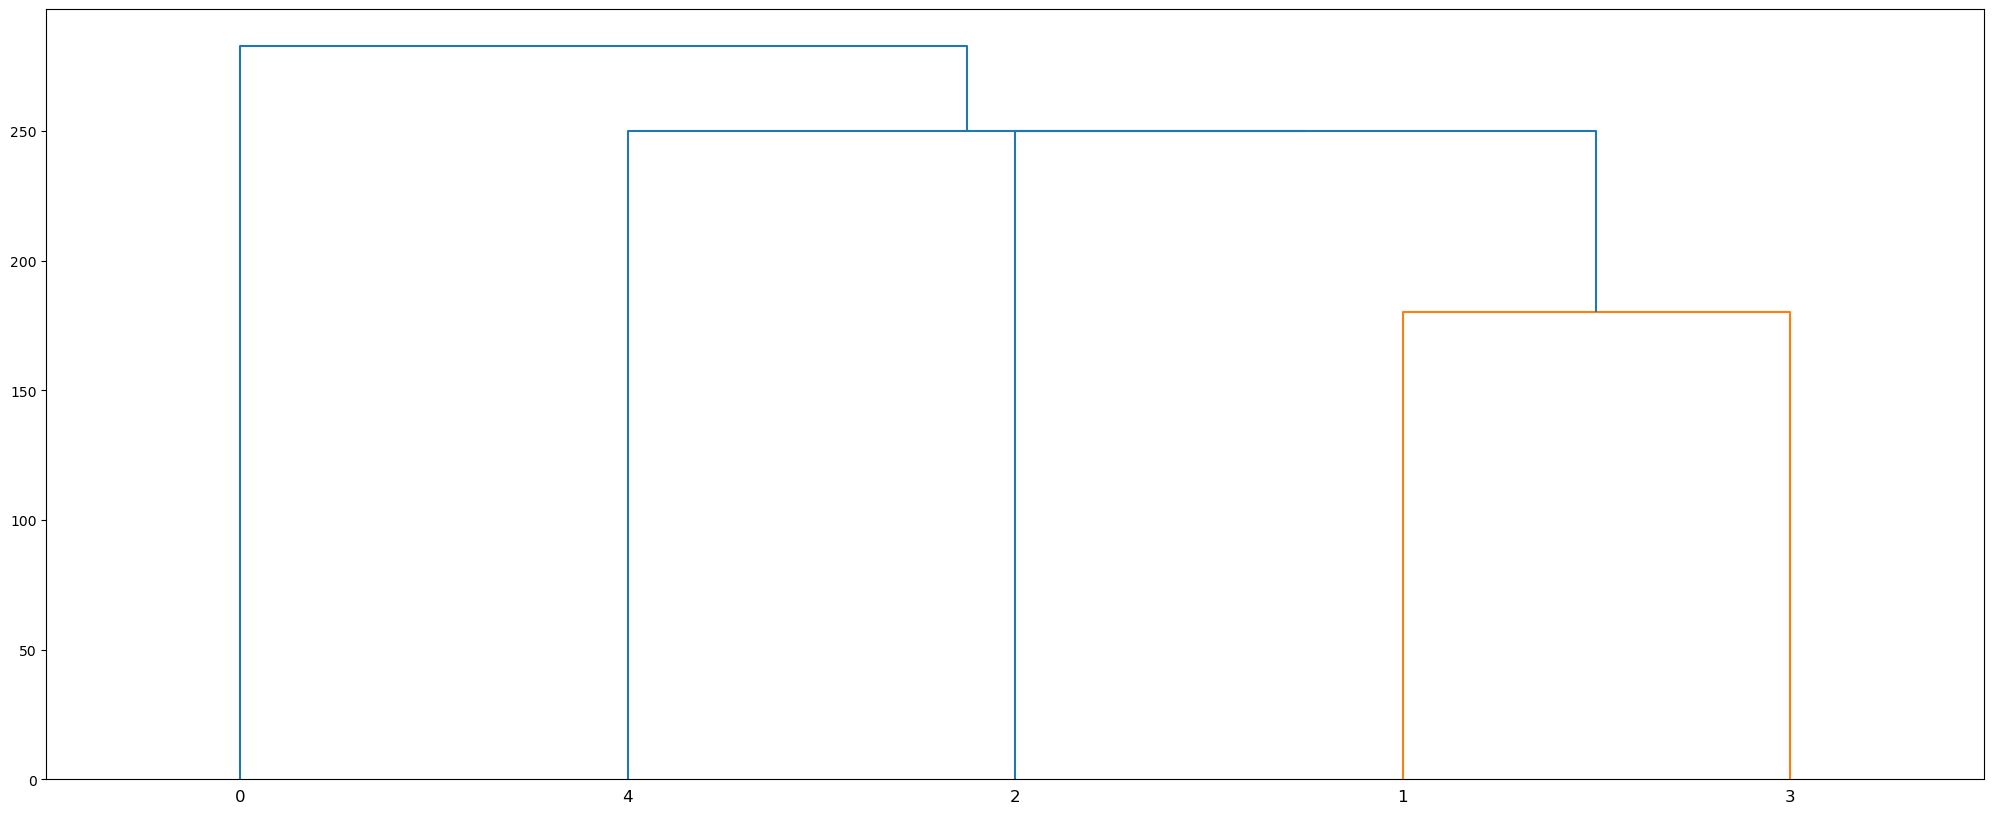

In [20]:
agglomerative_clustering(data, link=1)

[[         inf 282.84271247 403.11288741 460.97722286 651.92024052]
 [282.84271247          inf 250.         180.27756377 380.78865529]
 [403.11288741 250.                  inf 254.95097568 502.49378106]
 [460.97722286 180.27756377 254.95097568          inf 250.        ]
 [651.92024052 380.78865529 502.49378106 250.                  inf]]
++++++++++++++++++++++++++++++++++++++++++++++++++
[[         inf 460.97722286 403.11288741          inf 651.92024052]
 [460.97722286          inf 254.95097568          inf 380.78865529]
 [403.11288741 254.95097568          inf          inf 502.49378106]
 [         inf          inf          inf          inf          inf]
 [651.92024052 380.78865529 502.49378106          inf          inf]]
++++++++++++++++++++++++++++++++++++++++++++++++++
[[         inf 460.97722286          inf          inf 651.92024052]
 [460.97722286          inf          inf          inf 502.49378106]
 [         inf          inf          inf          inf          inf]
 [         i

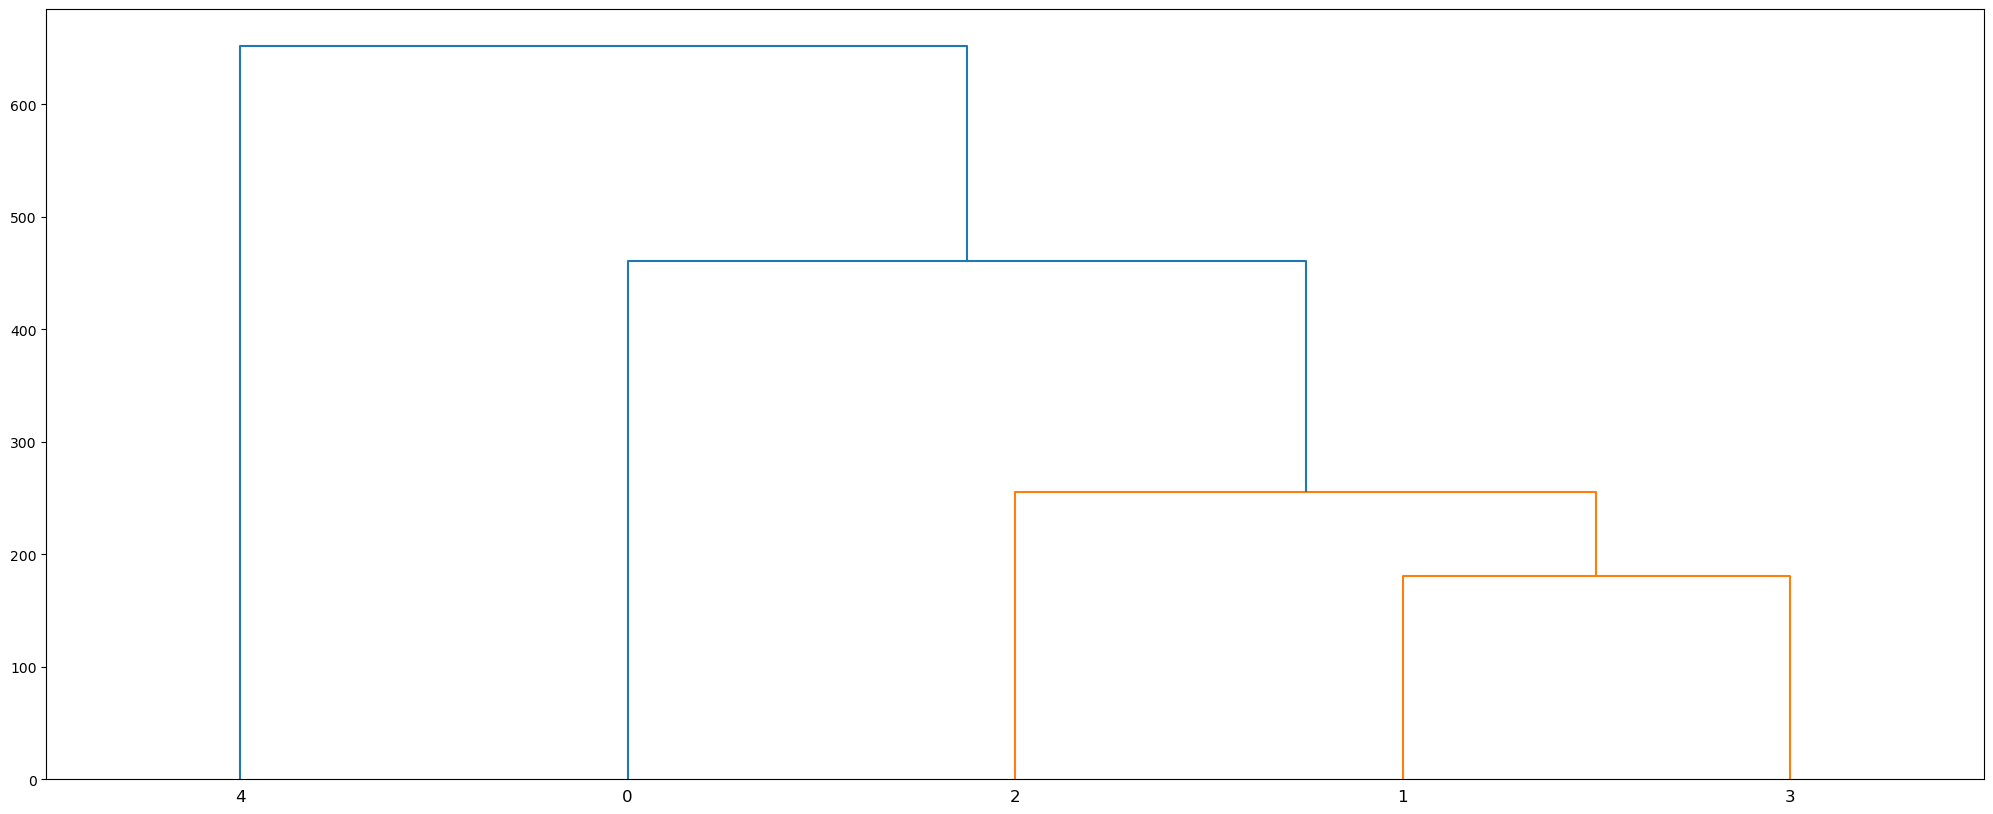

In [21]:
agglomerative_clustering(data, link=2)